#### Import libraries 

In [1]:
## data analysis and visualization
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

## data preprocess
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

## data modelling and prediction
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

  ## models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## model accuracy and validation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer,precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Exploratory Data Analysis

In [5]:
###1 Understand the context of data

#### 1.Load and Inspect the Data 

In [4]:
##load the data
df = pd.read_csv(r'C:\Users\shachini dinushika\Documents\Data\CreditRisk\credit_risk_dataset.csv')
pd.options.display.max_columns = None

##display the volume of the data
df.shape

(32581, 12)

In [5]:
##view the column names 
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
##check column data types
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [7]:
##display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
##view sample data
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [9]:
##check unique values in categorical columns
df[['person_home_ownership','loan_intent','loan_grade']].nunique()

person_home_ownership    4
loan_intent              6
loan_grade               7
dtype: int64

#### 2.Handle missing values

In [17]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

#### 3.Identify Duplicates and Data intergrity issues

In [20]:
##duplicate handling
df.duplicated().sum()

165

In [21]:
duplicated = df[df.duplicated(['person_age', 'person_income', 'person_home_ownership',
                               'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
                               'loan_int_rate', 'loan_status', 'loan_percent_income',
                               'cb_person_default_on_file', 'cb_person_cred_hist_length'], keep=False)]

duplicated = duplicated.sort_values(by=['person_age', 'person_income', 'person_home_ownership',
                               'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
                               'loan_int_rate', 'loan_status', 'loan_percent_income',
                               'cb_person_default_on_file', 'cb_person_cred_hist_length'])
duplicated.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15944,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
16835,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
2431,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
17758,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
2498,21,18000,RENT,0.0,DEBTCONSOLIDATION,A,3000,7.90,1,0.17,N,2


In [22]:
df = df.drop_duplicates()
df.shape

(32416, 12)

In [23]:
###identify inconsistent values

In [24]:
### handle outliers 
#df = df.drop(df[df['person_age'] > 100].index)

#### 4.Analyse target variable

In [31]:
df['loan_status'].value_counts()

loan_status
0    25327
1     7089
Name: count, dtype: int64

#### 5.Understand feature Distributions

In [34]:
### statistical summary of numerical variables
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [35]:
## Summary of categorical variables
df.describe(include='O')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32416,32416,32416,32416
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16378,6411,10703,26686


array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_status'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>, <Axes: >]],
      dtype=object)

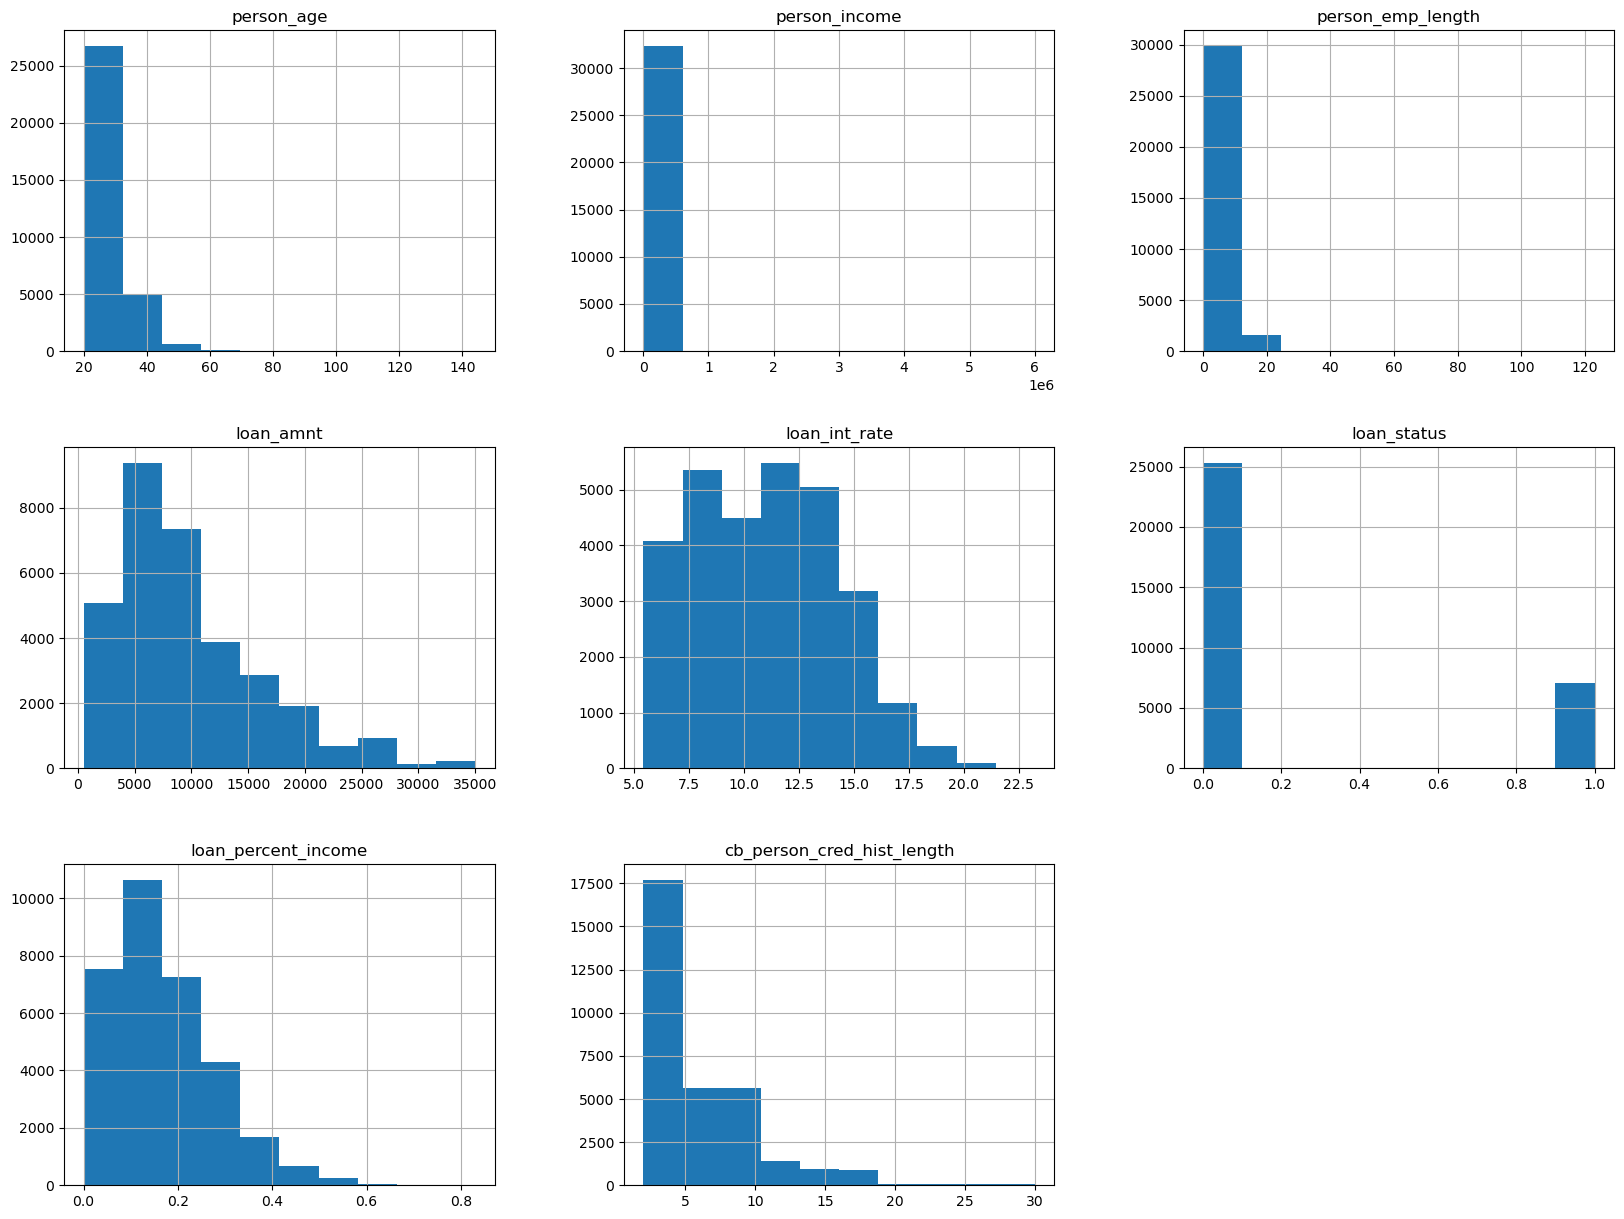

In [36]:
### Visualise the numerical distributions using histograms
df.hist(bins=10, figsize=(20,15))

#### 6.Detect Outliers

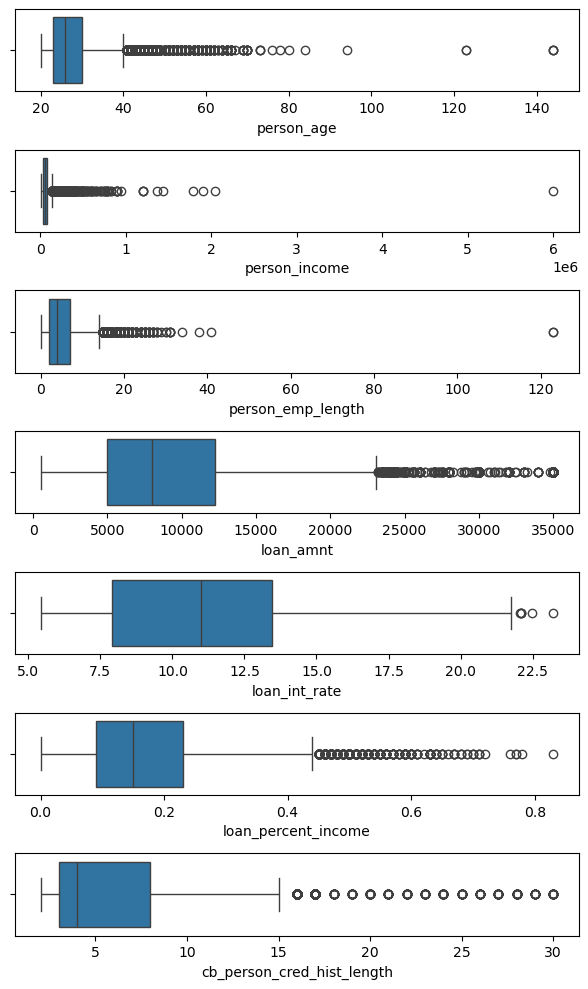

In [41]:
f, axes = plt.subplots(7, 1,figsize=(6, 10))
sns.boxplot(  x=df['person_age'], data=df,  orient='h', ax=axes[0])
sns.boxplot(  x=df['person_income'], data=df,  orient='h' , ax=axes[1])
sns.boxplot(  x=df['person_emp_length'], data=df,  orient='h' , ax=axes[2])
sns.boxplot(  x=df['loan_amnt'], data=df,  orient='h' , ax=axes[3])
sns.boxplot(  x=df['loan_int_rate'], data=df,  orient='h' , ax=axes[4])
sns.boxplot(  x=df['loan_percent_income'], data=df,  orient='h' , ax=axes[5])
sns.boxplot(  x=df['cb_person_cred_hist_length'], data=df,  orient='h' , ax=axes[6])

plt.tight_layout()
plt.show()

In [42]:
import numpy as np
import pandas as pd

# Define a function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in specific columns
outlier_cols = ['person_age', 'person_income', 'person_emp_length','loan_amnt',
               'loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
for col in outlier_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}: {len(outliers)}")

#Handling Outliers

# 1. Apply log transformation for skewed numeric features
df['person_income'] = np.log1p(df['person_income']) 
df['loan_amnt'] = np.log1p(df['loan_amnt']) 
df['person_emp_length'] = np.log1p(df['person_emp_length']) 


# 2. Cap outliers using Winsorization (limits extreme values)
def cap_outliers(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_cap = df[column].quantile(lower_percentile)
    upper_cap = df[column].quantile(upper_percentile)
    df[column] = np.clip(df[column], lower_cap, upper_cap)
    return df

for col in outlier_cols:
    df = cap_outliers(df, col)

# 3. Remove unrealistic values (e.g., employment length > 50 years)
df = df[df["person_emp_length"] <= 50]  
df = df[df["person_age"] <= 55]


# Display summary statistics after handling outliers
print(df[outlier_cols].describe())



Outliers in person_age: 1491
Outliers in person_income: 1478
Outliers in person_emp_length: 852
Outliers in loan_amnt: 1679
Outliers in loan_int_rate: 6
Outliers in loan_percent_income: 650
Outliers in cb_person_cred_hist_length: 1139
         person_age  person_income  person_emp_length     loan_amnt  \
count  31529.000000   31529.000000       31529.000000  31529.000000   
mean      27.475784      10.934503           1.476816      8.961240   
std        5.174112       0.489309           0.775667      0.665092   
min       22.000000      10.040332           0.000000      7.601402   
25%       23.000000      10.582967           1.098612      8.517393   
50%       26.000000      10.933125           1.609438      8.987322   
75%       30.000000      11.289794           2.079442      9.433564   
max       40.000000      11.835016           2.639057     10.085851   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  
count   28501.000000         31529.000000            

In [43]:
df.shape

(31529, 12)

In [44]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,10.985310,RENT,2.639057,PERSONAL,D,10.085851,16.02,1,0.38,Y,3
1,22,10.040332,OWN,1.791759,EDUCATION,B,7.601402,11.14,0,0.10,N,2
2,25,10.040332,MORTGAGE,0.693147,MEDICAL,C,8.612685,12.87,1,0.38,N,3
3,23,11.089821,RENT,1.609438,MEDICAL,C,10.085851,15.23,1,0.38,N,2
4,24,10.904138,RENT,2.197225,MEDICAL,C,10.085851,14.27,1,0.38,Y,4


In [45]:
# df[['person_income','loan_int_rate','person_age','loan_amnt',
#                            'loan_percent_income','person_emp_length','cb_person_cred_hist_length','cb_person_default_on_file']].loc[(df['person_income'] <= 30000)]

In [48]:
df.to_csv(r'C:\Users\shachini dinushika\Documents\Data\CreditRisk\credit_risk_dataset_cleaned.csv')

#### 7.Preprocess and Feature Engineering 

##### Normalize the Data

In [50]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer,make_column_selector, make_column_transformer

X,y = df.drop(['loan_status'], axis=1),df['loan_status']

num_pipeline = make_pipeline(SimpleImputer(strategy="median"))
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                              OneHotEncoder(handle_unknown="ignore"))


preprocessing = make_column_transformer((num_pipeline, make_column_selector(dtype_include=np.number)),
                                        (cat_pipeline, make_column_selector(dtype_include=object)),
                                         )

X_preprs = preprocessing.fit_transform(X)


X_preprs = pd.DataFrame(X_preprs, columns=preprocessing.get_feature_names_out(),index = df.index)
y_preprs = LabelEncoder().fit_transform(df['loan_status']) 


In [52]:
X_preprs.columns 

Index(['pipeline-1__person_age', 'pipeline-1__person_income',
       'pipeline-1__person_emp_length', 'pipeline-1__loan_amnt',
       'pipeline-1__loan_int_rate', 'pipeline-1__loan_percent_income',
       'pipeline-1__cb_person_cred_hist_length',
       'pipeline-2__person_home_ownership_MORTGAGE',
       'pipeline-2__person_home_ownership_OTHER',
       'pipeline-2__person_home_ownership_OWN',
       'pipeline-2__person_home_ownership_RENT',
       'pipeline-2__loan_intent_DEBTCONSOLIDATION',
       'pipeline-2__loan_intent_EDUCATION',
       'pipeline-2__loan_intent_HOMEIMPROVEMENT',
       'pipeline-2__loan_intent_MEDICAL', 'pipeline-2__loan_intent_PERSONAL',
       'pipeline-2__loan_intent_VENTURE', 'pipeline-2__loan_grade_A',
       'pipeline-2__loan_grade_B', 'pipeline-2__loan_grade_C',
       'pipeline-2__loan_grade_D', 'pipeline-2__loan_grade_E',
       'pipeline-2__loan_grade_F', 'pipeline-2__loan_grade_G',
       'pipeline-2__cb_person_default_on_file_N',
       'pipeline-2__

In [56]:
X_preprs.columns = ['person_age', 'person_income',
       'person_emp_length', 'loan_amnt',
       'loan_int_rate',
       'loan_percent_income',
       'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER',
       'person_home_ownership_OWN',
       'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL',
       'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C',
       'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G',
        'cb_person_default_on_file_N',
        'cb_person_default_on_file_Y'
                   ]


In [58]:
X_preprs.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22.0,10.985310,2.639057,10.085851,16.02,0.38,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,22.0,10.040332,1.791759,7.601402,11.14,0.10,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25.0,10.040332,0.693147,8.612685,12.87,0.38,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,23.0,11.089821,1.609438,10.085851,15.23,0.38,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24.0,10.904138,2.197225,10.085851,14.27,0.38,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


##### Finding feature importance

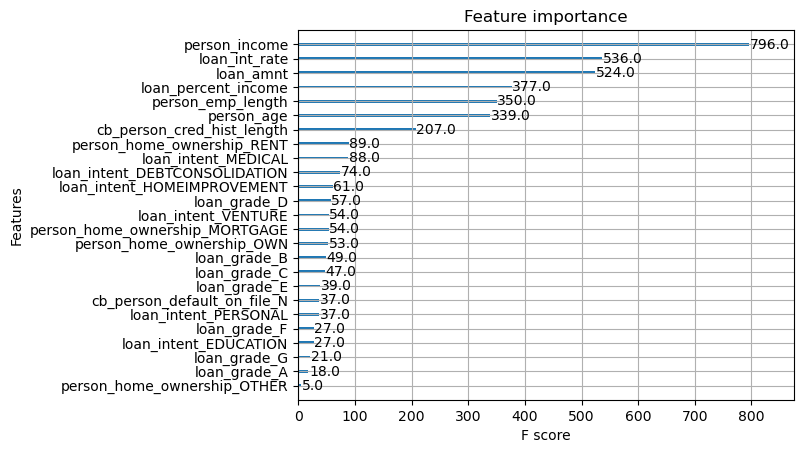

In [60]:
Xgb = XGBClassifier()
Xgb.fit(X_preprs, y_preprs)

# Get feature importances
importances = Xgb.feature_importances_

plot_importance(Xgb)
pyplot.show()

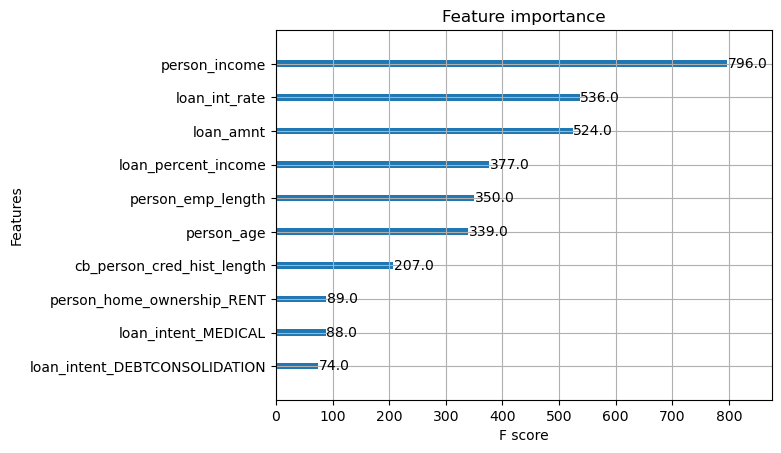

In [62]:
plot_importance(Xgb,max_num_features=10)
pyplot.show()

#### 8.Explore Feature Relationships

In [64]:
y = pd.DataFrame(y_preprs)
y.columns = ['loan_status']

In [66]:
cln_df = pd.concat([X_preprs,y],axis = 1)

In [68]:
cln_df.to_csv(r'C:\Users\shachini dinushika\Documents\Data\CreditRisk\credit_risk_dataset_cleaned.csv')

In [70]:
cln_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
0,22.0,10.985310,2.639057,10.085851,16.02,0.38,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,22.0,10.040332,1.791759,7.601402,11.14,0.10,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,25.0,10.040332,0.693147,8.612685,12.87,0.38,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,23.0,11.089821,1.609438,10.085851,15.23,0.38,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,24.0,10.904138,2.197225,10.085851,14.27,0.38,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [74]:
corr_matrix = cln_df.corr()
corr_matrix["loan_status"].sort_values(ascending=False)

loan_status                       1.000000
loan_percent_income               0.037993
loan_amnt                         0.024255
person_home_ownership_RENT        0.020747
loan_int_rate                     0.016634
loan_grade_E                      0.009207
loan_intent_MEDICAL               0.008801
cb_person_default_on_file_Y       0.008689
loan_grade_F                      0.007294
loan_grade_G                      0.005135
loan_grade_B                      0.004948
person_home_ownership_OWN         0.004304
person_home_ownership_OTHER       0.004221
loan_grade_C                      0.003567
loan_intent_VENTURE               0.003447
loan_grade_D                      0.002871
loan_intent_EDUCATION             0.001212
person_income                    -0.002214
loan_intent_DEBTCONSOLIDATION    -0.003309
loan_intent_PERSONAL             -0.004882
loan_intent_HOMEIMPROVEMENT      -0.006977
cb_person_default_on_file_N      -0.008689
person_emp_length                -0.011980
loan_grade_

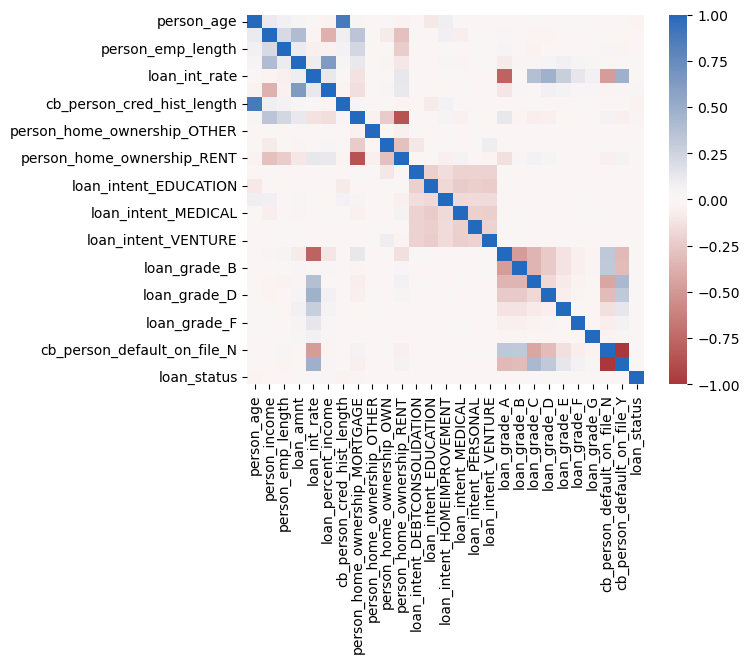

In [76]:
cmap = sns.color_palette('vlag', as_cmap=True).reversed()
sns.heatmap(cln_df.corr( method ='pearson'), cmap=cmap, vmin=-1, vmax=1)
plt.show()

##### Check for multicollinearity 

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
selected_cols = X_preprs
vif_data = pd.DataFrame()
vif_data["feature"] = selected_cols.columns


vif_data['VIF'] = [variance_inflation_factor(selected_cols.values, i)
                          for i in range(len(selected_cols.columns))]

print(vif_data)

C:\Users\shachini dinushika\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                           feature       VIF
0                       person_age  4.388672
1                    person_income  5.535619
2                person_emp_length  1.087686
3                        loan_amnt  7.571369
4                    loan_int_rate  5.717478
5              loan_percent_income  7.356630
6       cb_person_cred_hist_length  4.339935
7   person_home_ownership_MORTGAGE       inf
8      person_home_ownership_OTHER       inf
9        person_home_ownership_OWN       inf
10      person_home_ownership_RENT       inf
11   loan_intent_DEBTCONSOLIDATION       inf
12           loan_intent_EDUCATION       inf
13     loan_intent_HOMEIMPROVEMENT       inf
14             loan_intent_MEDICAL       inf
15            loan_intent_PERSONAL       inf
16             loan_intent_VENTURE       inf
17                    loan_grade_A       inf
18                    loan_grade_B       inf
19                    loan_grade_C       inf
20                    loan_grade_D       inf
21        

#### 9.Check for inbalances in data distribution

In [80]:
cln_df['loan_status'].value_counts(normalize=True)

loan_status
0.0    0.784072
1.0    0.215928
Name: proportion, dtype: float64

In [82]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_preprs, y_preprs)
print("Oversampled class distribution:", Counter(y_over))

Oversampled class distribution: Counter({1: 24721, 0: 24721})


In [84]:
X_over.shape

(49442, 26)

In [86]:
X_preprs.shape

(31529, 26)

In [88]:
feature_importance = pd.DataFrame({'Feature':X_over.columns ,
                                   'importance': importances  }).sort_values(by='importance'
                                                , ascending = False)

#top_n_features = feature_importance['Feature'].head(7).values

X_selected_data = X_over[['person_income','loan_int_rate','person_age','loan_amnt',
                           'loan_percent_income','person_emp_length','cb_person_cred_hist_length']]

In [90]:
X_selected_data.head()

,person_income,loan_int_rate,person_age,loan_amnt,loan_percent_income,person_emp_length,cb_person_cred_hist_length
0,10.985310,16.02,22.0,10.085851,0.38,2.639057,3.0
1,10.040332,11.14,22.0,7.601402,0.10,1.791759,2.0
2,10.040332,12.87,25.0,8.612685,0.38,0.693147,3.0
3,11.089821,15.23,23.0,10.085851,0.38,1.609438,2.0
4,10.904138,14.27,24.0,10.085851,0.38,2.197225,4.0


In [92]:
X_selected_data.shape

(49442, 7)

### Data split

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X_selected_data, y_over, test_size=0.2, random_state=42)

### Scale the data

In [96]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

### Train the models

In [98]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()]

names = ['Logistic Regression','Decision Tree','Random Forest']

for model, name in zip(models,names):
    print(' ')
    model.fit( X_train_scaled,y_train ) #model train
    y_pred = model.predict( X_test_scaled ) #predictions
    print('Accuracy',metrics.accuracy_score(y_test,y_pred))
    print ( 'Model:', name )
    print(classification_report(y_test, y_pred)) # creat a report
    print(' ')
    print ( name ,':','Confusion Matrix' ) # check for false positives and negatives
    print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

 
Accuracy 0.754575791283244
Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      5017
           1       0.75      0.75      0.75      4872

    accuracy                           0.75      9889
   macro avg       0.75      0.75      0.75      9889
weighted avg       0.75      0.75      0.75      9889

 
Logistic Regression : Confusion Matrix
      0     1
0  3802  1215
1  1212  3660
 
Accuracy 0.9265850945494994
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      5017
           1       0.88      0.98      0.93      4872

    accuracy                           0.93      9889
   macro avg       0.93      0.93      0.93      9889
weighted avg       0.93      0.93      0.93      9889

 
Decision Tree : Confusion Matrix
      0     1
0  4386   631
1    95  4777
 
Accuracy 0.9479219334614217
Model: Random Forest
              precision    r

### Evaluation of the models

#### K-Fold cross validation

In [100]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()]

names = ['Logistic Regression','Decision Tree','Random Forest']

for model, name in zip(models,names):
  print(' ')
  print(name)
  for score in ['accuracy','precision','recall']:
      if score  == 'precision':
          scoring = make_scorer(precision_score, average='weighted')
      elif score == "recall":
          scoring = make_scorer(recall_score, average='weighted')
      else:
          scoring = score
      mean_score = cross_val_score(model, X_train_scaled, y_train, scoring=scoring, cv=5).mean()
      print(f"{score}: {mean_score:.4f}")

 
Logistic Regression
accuracy: 0.7610
precision: 0.7610
recall: 0.7610
 
Decision Tree
accuracy: 0.9114
precision: 0.9158
recall: 0.9109
 
Random Forest
accuracy: 0.9392
precision: 0.9419
recall: 0.9395


### Optimize the models

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import resample

# Define models
models = {
     'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Define parameter grids for each model

param_grids = {
     'Logistic Regression': {
        'C': [0.01,0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear', 'saga'],
        'class_weight': [None, 'balanced']
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 2, 5, 10],
        'min_samples_split': [10,20,50],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]

    },
    'Random Forest': {
        'criterion': ['gini', 'entropy'],
        'n_estimators': [10, 20],
        'max_depth': [None, 2, 5, 10],
        'min_samples_split': [10,20,50],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }
}


X_train_sample, y_train_sample = resample(X_train_scaled, y_train, n_samples=10000, random_state=42)


best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    
   
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        n_iter=50,  
        cv=5, 
        scoring='accuracy',
        #n_jobs=-1,  # Utilize all CPU cores
        random_state=42 
    )
    
    # Fit RandomizedSearchCV on the subsampled dataset
    random_search.fit(X_train_sample, y_train_sample)
    best_models[model_name] = random_search.best_estimator_
    
    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best score for {model_name}: {random_search.best_score_}")

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name} on the test set...")
    score = model.score(X_test_scaled, y_test)
    print(f"Test set score for {model_name}: {score}")



Tuning Logistic Regression...


C:\Users\shachini dinushika\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'class_weight': None, 'C': 0.1}
Best score for Logistic Regression: 0.7571000000000001
Tuning Decision Tree...
Best parameters for Decision Tree: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}
Best score for Decision Tree: 0.8018000000000001
Tuning Random Forest...
Best parameters for Random Forest: {'n_estimators': 20, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}
Best score for Random Forest: 0.8413

Evaluating Logistic Regression on the test set...
Test set score for Logistic Regression: 0.7541713014460512

Evaluating Decision Tree on the test set...
Test set score for Decision Tree: 0.7928000808979674

Evaluating Random Forest on the test set...
Test set score for Random Forest: 0.8234401860653251


### Save the final model for deployment

In [104]:
Rf_clf = RandomForestClassifier(n_estimators = 20, 
                                min_samples_split = 20, 
                                min_samples_leaf = 1, 
                                max_features = None, 
                                max_depth = None, 
                                criterion = 'gini')
Rf_clf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_features=None, min_samples_split=20, n_estimators=20)

In [106]:
y_pred = Rf_clf.predict(X_test_scaled)

In [108]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,4418,599
1,420,4452


In [110]:
import pickle 

pickle_out = open("Rf_clf.pkl", "wb") 
pickle.dump(Rf_clf, pickle_out) 
pickle_out.close()

In [112]:
pickle_in = open(r'C:\Users\shachini dinushika\Documents\100daysPy\45daysDS&ML\Rf_clf.pkl', 'rb') 
log_reg = pickle.load(pickle_in)

def prediction(person_income,loan_int_rate,person_age,loan_amnt,loan_percent_income,person_emp_length,cb_person_cred_hist_length):

    data = pd.DataFrame([[person_income,loan_int_rate,person_age,loan_amnt,loan_percent_income,person_emp_length,cb_person_cred_hist_length]],
                        columns = ['person_income','loan_int_rate','person_age','loan_amnt','loan_percent_income',
                        'person_emp_length','cb_person_cred_hist_length'] )
   
    prediction = Rf_clf.predict(data)
    
    #print(prediction)

    return prediction

In [122]:
result = prediction(30000,12,20,10000,0.3,1,6)

if result == 0 :
    result = " Non-Default"
else : "Default"

print(result)


[1]
[1]
